In [1]:
import keras
import numpy as np
import pandas as pd
import math
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input
from keras.layers import Dense, Conv2D, MaxPooling2D , Flatten
from keras.models import Model
from tensorflow.keras import optimizers

In [2]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')


/
Mounted at /content/gdrive


In [3]:
%cd /content

/content


In [4]:
!unzip gdrive/My\ Drive/vgg16_dataset/dataset3a.zip

Archive:  gdrive/My Drive/vgg16_dataset/dataset3a.zip
   creating: train/plane/
  inflating: train/plane/PLANE1.jpg  
  inflating: train/plane/PLANE10.jpg  
  inflating: train/plane/PLANE100.jpg  
  inflating: train/plane/PLANE103.jpg  
  inflating: train/plane/PLANE106.jpg  
  inflating: train/plane/PLANE107.jpg  
  inflating: train/plane/PLANE108.jpg  
  inflating: train/plane/PLANE109.jpg  
  inflating: train/plane/PLANE11.jpg  
  inflating: train/plane/PLANE110.jpg  
  inflating: train/plane/PLANE1100.jpg  
  inflating: train/plane/PLANE1101.jpg  
  inflating: train/plane/PLANE1102.jpg  
  inflating: train/plane/PLANE1103.jpg  
  inflating: train/plane/PLANE1104.jpg  
  inflating: train/plane/PLANE1105.jpg  
  inflating: train/plane/PLANE1106.jpg  
  inflating: train/plane/PLANE1107.jpg  
  inflating: train/plane/PLANE1108.jpg  
  inflating: train/plane/PLANE1109.jpg  
  inflating: train/plane/PLANE111.jpg  
  inflating: train/plane/PLANE1110.jpg  
  inflating: train/plane/PLANE111

In [5]:
batch_size=32
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="train",target_size=(224,224))
tsdata = ImageDataGenerator()
validdata = tsdata.flow_from_directory(directory="validation",target_size=(224,224))

Found 962 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [6]:
traindata[0]

(array([[[[  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.]],
 
         [[  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.]],
 
         [[  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.]],
 
         ...,
 
         [[  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.]],
 
         [[  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          ...,
          [  0.,   0.,   0.],
          [  0.,   0.,   0.],
          [  0.,   0.,   0.

In [7]:
image_shape=traindata.image_shape
image_shape


(224, 224, 3)

In [12]:
l1=Input(shape=image_shape)
l2 = Conv2D(64, (3,3), padding='same', activation='relu')(l1)
l3 = Conv2D(64, (3,3), padding='same', activation='relu')(l2)
l4 = MaxPooling2D((2,2), strides=(2,2))(l3)
l5 = Conv2D(128, (3,3), padding='same', activation='relu')(l4)
l6 = Conv2D(128, (3,3), padding='same', activation='relu')(l5)
l7 = MaxPooling2D((2,2), strides=(2,2))(l6)
l8 = Conv2D(256, (3,3), padding='same', activation='relu')(l7)
l9 = Conv2D(256, (3,3), padding='same', activation='relu')(l8)
l10 = Conv2D(256, (3,3), padding='same', activation='relu')(l9)
l11 = MaxPooling2D((2,2), strides=(2,2))(l10)
l12 = Conv2D(512, (3,3), padding='same', activation='relu')(l11)
l13 = Conv2D(512, (3,3), padding='same', activation='relu')(l12)
l15 = Conv2D(512, (3,3), padding='same', activation='relu')(l13)
l16 = MaxPooling2D((2,2), strides=(2,2))(l15)
l17 = Conv2D(512, (3,3), padding='same', activation='relu')(l16)
l18 = Conv2D(512, (3,3), padding='same', activation='relu')(l17)
l19 = Conv2D(512, (3,3), padding='same', activation='relu')(l18)
l20 = MaxPooling2D((2,2), strides=(2,2))(l19)
fc1=keras.layers.Flatten()(l20)
fc11=Dense(4096, activation='relu')(fc1)
fc12=Dense(4096, activation='relu')(fc11)
fc13=Dense(2, activation='softmax')(fc12)
model1 = Model(inputs=l1, outputs=fc13)
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0   

In [13]:
from tensorflow.keras.optimizers import Adam

In [14]:

opt = Adam(learning_rate=0.001)
model1.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [15]:

history = model1.fit_generator(
      traindata,
      steps_per_epoch=math.ceil(traindata.samples//batch_size),
      epochs=5,
      verbose=1,
      validation_data = validdata,
      validation_steps=math.ceil(validdata.samples//batch_size))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
30/30 [==============================] - 35s 945ms/step - loss: 541.8228 - accuracy: 0.5108 - val_loss: 0.6873 - val_accuracy: 0.5000
Epoch 2/5
30/30 [==============================] - 25s 836ms/step - loss: 0.7039 - accuracy: 0.5796 - val_loss: 0.4774 - val_accuracy: 0.7891
Epoch 3/5
30/30 [==============================] - 25s 835ms/step - loss: 0.5102 - accuracy: 0.7796 - val_loss: 0.3821 - val_accuracy: 0.8047
Epoch 4/5
30/30 [==============================] - 25s 834ms/step - loss: 0.3141 - accuracy: 0.8570 - val_loss: 0.2791 - val_accuracy: 0.9219
Epoch 5/5
30/30 [==============================] - 25s 836ms/step - loss: 0.2769 - accuracy: 0.9043 - val_loss: 0.2336 - val_accuracy: 0.9531


Text(0.5, 1.0, 'Training and Validation Accuracy')

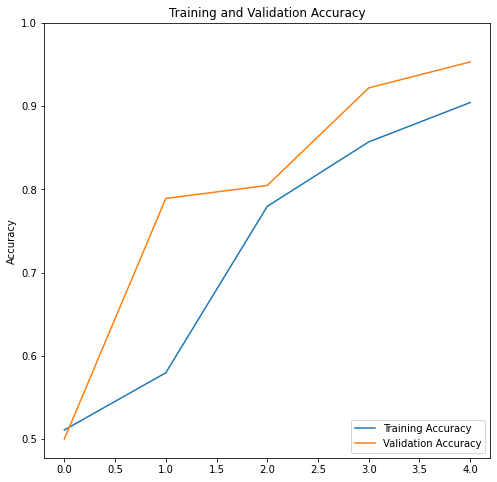

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

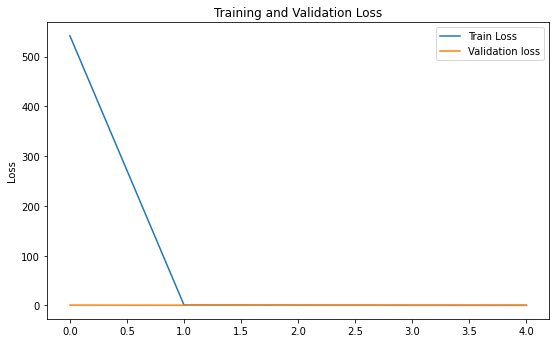

In [20]:
plt.figure(figsize=(9, 12))
plt.subplot(2, 1, 1)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')

plt.title('Training and Validation Loss')

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

Saving image_0_1164 - Copy.jpeg to image_0_1164 - Copy.jpeg
car


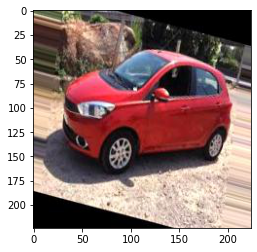

In [18]:


uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  img = np.asarray(img)
  plt.imshow(img)
  img = np.expand_dims(img, axis=0)
  classes = model1.predict(img)
  a=classes[0]
  pos=np.argmax(a)
  if pos==0:
    print("plane")
  elif pos==1:
    print("car")


In [42]:
classes

array([[0.50243264, 0.49756742]], dtype=float32)

In [61]:
img.shape

(1, 224, 224, 3)